# The Qubit

A qubit is a quantum two-level system. Denoting the two states as $|0\rangle$ and $|1\rangle$, we can write the state of the qubit $|q\rangle$ as

$$ |q\rangle = \cos\frac{\theta}{2}|0\rangle + e^{i\phi}\sin\frac{\theta}{2}|1\rangle $$

where $0\leq\theta\leq\pi$ and $0\leq\phi<2\pi$. The angle $\phi$ is called the $\textbf{relative phase}$ of the qubit. The probability of measuring the qubit in each of the states are

$$ \begin{align} P(|q\rangle=|0\rangle)&=\cos^2\left(\frac{\theta}{2}\right) \\
                 P(|q\rangle=|1\rangle)&=\sin^2\left(\frac{\theta}{2} \right) \end{align}$$

# Musical Analogy

Let $|0\rangle=|\text{L}\rangle$ and $|1\rangle=|\text{R}\rangle$. Then, a qubit in the state

$$ |q\rangle = \cos\frac{\theta}{2}|\text{L}\rangle + e^{i\phi}\sin\frac{\theta}{2}|\text{R}\rangle $$

corresponds to
- a note of frequency $f$ in the left ear with amplitude $P(|q\rangle=|\text{L}\rangle)=\cos^2(\theta/2)$ and
- a note of frequency $2^{\phi/2\pi}f$ in the right ear with amplitude $P(|q\rangle=|\text{R}\rangle)=\cos^2(\theta/2)$.

That is

- $\theta$ determines how load the sounds is in each ear (the amplitude of the soundwaves) while
- $\phi$ determines the interval between the two notes (the ratio of the frequencies of the soundwaves).

(Here, $f$ has been set to be the frequency corresponding to the note C4. That is, $f=2^{-9/12}f_A$ where $f_A=440$ is the frequency of A4.)

In [ ]:
import simpleaudio as sa
import numpy as np
from qiskit import *
from qiskit.visualization import plot_bloch_multivector, circuit_drawer
from PIL import ImageTk, Image

pi = np.pi

def sound(circ,note): 

    if (note == 'C'):
        f = 440*2**(-9/12)
    if (note == 'C#') or (note == 'Db'):
        f = 440*2**(-8/12)
    if (note == 'D'):
        f = 440*2**(-7/12)
    if (note == 'D#') or (note == 'Eb'):
        f = 440*2**(-6/12)
    if (note == 'E'):
        f = 440*2**(-5/12)
    if (note == 'F'):
        f = 440*2**(-4/12)
    if (note == 'F#') or (note == 'Gb'):
        f = 440*2**(-3/12)
    if (note == 'G'):
        f = 440*2**(-2/12)
    if (note == 'G#') or (note == 'Ab'):
        f = 440*2**(-1/12)
    if (note == 'A'):
        f = 440*2**(0/12)
    if (note == 'A#') or (note == 'Bb'):
        f = 440*2**(1/12)
    if (note == 'B'):
        f = 440*2**(2/12)
    
    backend = BasicAer.get_backend('statevector_simulator')
    result = execute(circ, backend).result()
    sv = result.get_statevector()
    theta = np.real(2*np.arccos(sv[0]))
    phi = np.real(np.angle(sv[1]))
    if phi < 0:
        phi = 2*pi + phi
      
    fs = 44100  # 44100 samples per second
    seconds = 0.5  # Note duration of 2 seconds
    t = np.linspace(0, seconds, seconds * fs, False) # Generate array with seconds*sample_rate steps

    # Create sound
    left =  (np.cos(theta/2))*np.sin(f*t*2*pi)
    right = (np.sin(theta/2))*np.sin(2**(phi/(2*np.pi))*f*t*2*pi+pi/2) 
    
    note = np.dstack((left,right))[0]

    # Ensure that highest value is in 16-bit range
    audio = note * (2**15 - 1) / np.max(np.abs(note))
    audio = audio.astype(np.int16) # Convert to 16-bit data
    
    # Playback
    play_obj = sa.play_buffer(audio, 2, 2, fs)
    play_obj.wait_done()
    
#     return plot_bloch_multivector(sv)

# XY - Plane

Where the Bloch vector points on the xy-plane of the Bloch sphere determines the frequency of the note played in the right ear. If the angle (from the positive $x$-axis) is a multiple of $2\pi/12$, then the sound in the right ear will correspond to one of the 12 notes (in equal-temperament tuning), as shown below:
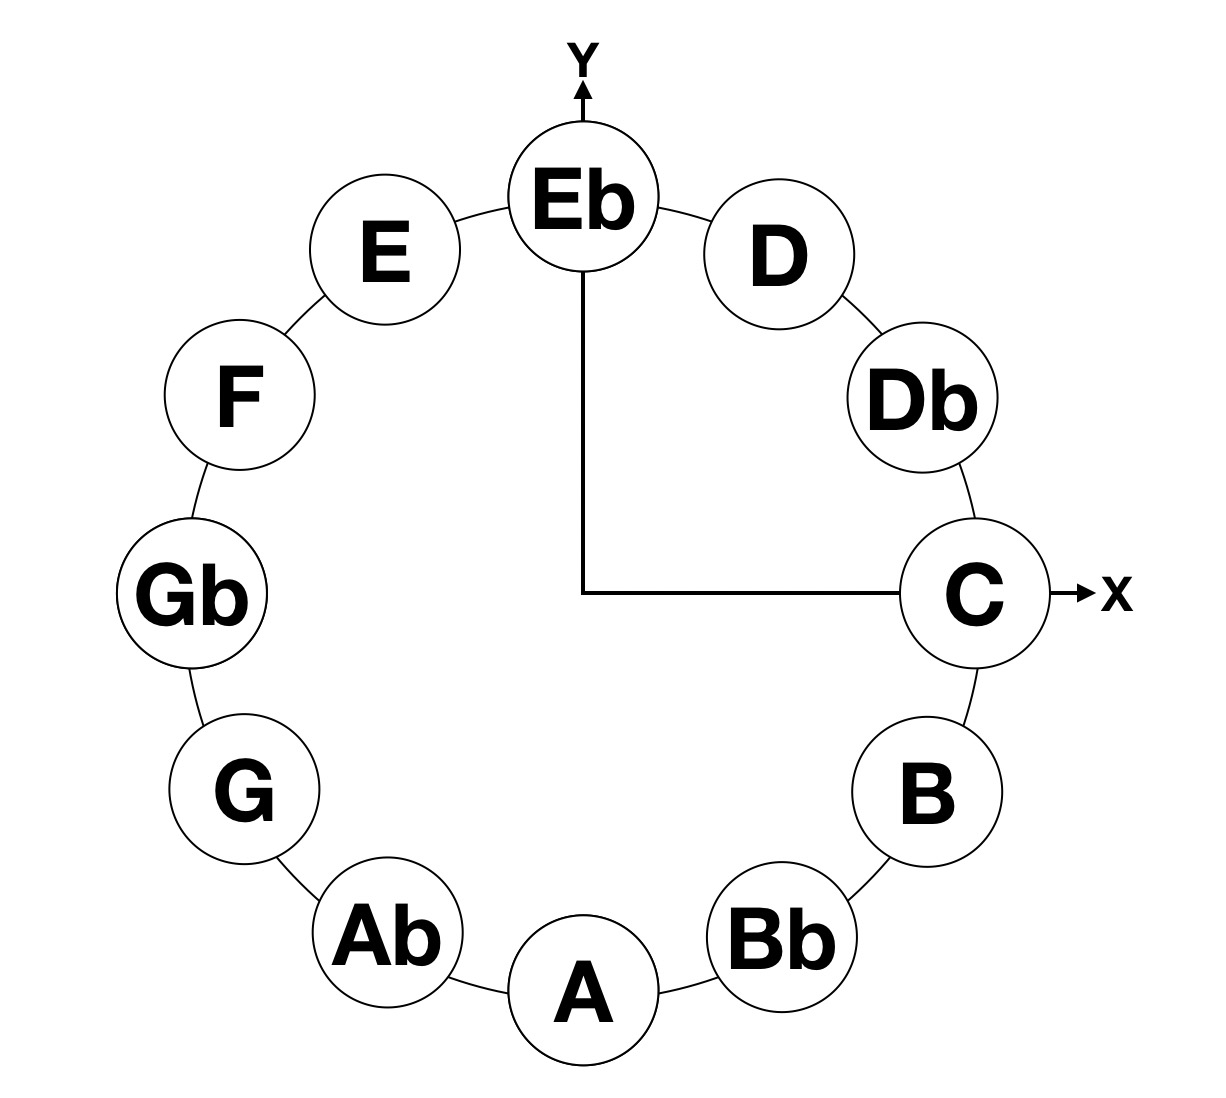 

## Relative Phase and Intervals

### Invervals

In music, an $\textbf{interval}$ is the ratio of the frequencies of two notes. That is, if note one has frequencey $f_1$ and note two has frequencey $f_2$, then $f_1/f_2$ determines the interval between the two notes. 

Interestingly, if $f_1/f_2=2$, then our minds perceive the two notes to be basically be the same. This is called the octave. Run the example below to hear what an octave sounds like:

In [ ]:
f = 440*2**(-9/12)  # The frequency corresponding to a middle-C.
fs = 44100  # 44100 samples per second
seconds = 2 # Note duration of 2 seconds
t = np.linspace(0, seconds, seconds * fs, False) # Generate array with seconds*sample_rate steps

# Create sound
interval = 2

note = np.sin(f*t*2*pi)+np.sin(2*f*t*2*pi)

# Ensure that highest value is in 16-bit range
audio = note * (2**15 - 1) / np.max(np.abs(note))
audio = audio.astype(np.int16) # Convert to 16-bit data

# Playback
play_obj = sa.play_buffer(audio, 1, 2, fs)
play_obj.wait_done()

In [ ]:
f = 440*2**(-9/12)  # The frequency corresponding to a middle-C.
fs = 44100  # 44100 samples per second
seconds = 2 # Note duration of 2 seconds
t = np.linspace(0, seconds, seconds * fs, False) # Generate array with seconds*sample_rate steps

# Create sound
interval = 2
note_1 = np.sin(f*t*2*pi) # First note: at frequencey f
note_2 = np.sin(interval*f*t*2*pi) # Second note: at frequency 2*f

note = note_1 + note_2 # Play note_1 and note_2 at the same time

# Ensure that highest value is in 16-bit range
audio = note * (2**15 - 1) / np.max(np.abs(note))
audio = audio.astype(np.int16) # Convert to 16-bit data

# Playback
play_obj = sa.play_buffer(audio, 1, 2, fs)
play_obj.wait_done()

Note that while the second note sounds "higher" than the first note, the two sound the "same" in some sense. (You can try changing interval to something between 1 and 2 and note that the two sounds will not sound like the same note.) Therefore, in music, we call both of these notes by the same note-name, in this case, C. That is, our brains perceive notes to cycle around in a circle (as in the diagram above).

In Western music, the octave is "divided" into 12 notes. They are labeled as in the above diagram (flat labeling). In modern (equal-temperament) tuning, we set the intervals between adjacent notes to be equal. That is, if we label the frequency of the 12 notes to be $f_1,...,f_{12}$, then the ratio between neighboring frequencies (half-step) is set to be $f_{i+1}/f_i=2^{1/12}$ (for $i=2,...,12$). Note that the ratio between notes that are two a part is then

$$\frac{f_{i+2}}{f_i}=\frac{2^{1/12}f_{i+1}}{f{i}}=2^{1/12}2^{1/12}=2^{2/12}$$

since $f_{i+2}/f_{i+1}=2^{1/12}$. In general

$$\frac{f_{i+n}}{f_i}=2^{n/12}$$

Now you can see why we chose the half-step to correspond to a ratio of frequencies of $2^{1/12}$. Since we divided the octave into 12 notes, if we go up 12 notes, we should return to the same note (just an octave higher). Which, with our definition, is exactly what happens because the ratio of the frequencies of notes 12 notes apart is $f_{i+12}/f_{i}=2^{12/12}=2$ which corresponds to the interval of an octave.

Recall that, as defined at the start, a qubit with relative phase $\phi$ will correspond to notes being played with a ratio of freqeuncies of $I=2^{\phi/2\pi}$. Then, since $0\leq\phi<2\pi$, we have that $1\leq I<2$. That is, the interval can be anywhere between unison $I=1$ and an octave $I=2$. But $\textit{pro-tip}$, if you want the interval to sound "nice" and be one of the intervals used in modern Western music, you should create your quantum circuit in a way that makes the relative phase equal $\phi=(n/12)2\pi$ for $n=0,...,11$.

### Global Phase

Since our minds perceive the ratios of frequencies, we will perceive the same interval, regardless of what the base frequency is. This is because, if the frequence of the first note is $f_1=f$ and the frequency of the second note is $r$ times that of the first, $f_2=rf$, then the ratio of their frequencies $f_2/f_1=rf/f=r$ doesn't depend on $f$. (This is the property that allows us to recognize a song regardless of what key it's in.) Because of this, we can always divide both frequencies by the same amount so that the first note is C. But this is exactly analagous to the fact that one can divide out the global phase of a qubit. For example, below is an E and a B being played at the same time, and the next cell is a C and a G.

In [ ]:
## E and B ##

f = 440*2**(-9/12)  # The frequency corresponding to a middle-C.
fs = 44100  # 44100 samples per second
seconds = 2 # Note duration of 2 seconds
t = np.linspace(0, seconds, seconds * fs, False) # Generate array with seconds*sample_rate steps

# Create sound
theta = pi/2
note_1 = (np.cos(theta/2)**2)*np.sin((2**(4/12))*f*t*2*pi) # E
note_2 = (np.sin(theta/2)**2)*np.sin((2**(11/12))*f*t*2*pi) # B

note = note = np.dstack((note_1,note_2))[0] # Play note_1 and note_2 at the same time

# Ensure that highest value is in 16-bit range
audio = note * (2**15 - 1) / np.max(np.abs(note))
audio = audio.astype(np.int16) # Convert to 16-bit data

# Playback
play_obj = sa.play_buffer(audio, 2, 2, fs)
play_obj.wait_done()

In [ ]:
## C and G ##

f = 440*2**(-9/12)  # The frequency corresponding to a middle-C.
fs = 44100  # 44100 samples per second
seconds = 2 # Note duration of 2 seconds
t = np.linspace(0, seconds, seconds * fs, False) # Generate array with seconds*sample_rate steps

# Create sound
f_base = 1 # Feel free to change f_base to anything, and you will always hear a fifth.
theta = pi/2
note_1 = (np.cos(theta/2)**2)*np.sin((2**(0/12))*f*t*2*pi*f_base) # E
note_2 = (np.sin(theta/2)**2)*np.sin((2**(7/12))*f*t*2*pi*f_base) # B

note = np.dstack((note_1,note_2))[0] # Play note_1 and note_2 at the same time

# Ensure that highest value is in 16-bit range
audio = note * (2**15 - 1) / np.max(np.abs(note))
audio = audio.astype(np.int16) # Convert to 16-bit data

# Playback
play_obj = sa.play_buffer(audio, 2, 2, fs)
play_obj.wait_done()

Despite being completely different notes, the two sets of notes sound similar because they are the same interval apart (a fifth). This can be seen to be analagous to factoring out the global phase of a qubit as follows.
$$ 
\begin{align} 
\text{E in the left ear and B in the right ear}
&=e^{i(4/12)2\pi}\cos(\theta/2)|0\rangle + e^{i(11/12)2\pi}\sin(\theta/2)|1\rangle \\
&=e^{i(4/12)2\pi}\cos(\theta/2)|0\rangle + e^{i(7/12)2\pi}\sin(\theta/2)|1\rangle\\
&\equiv \cos(\theta/2)|0\rangle + e^{i(7/12)2\pi}\sin(\theta/2)|1\rangle \ \text{up to a global phase} \\
&= \text{C in the left ear and G in the right ear}
\end{align}
$$

# Polar Angle

The angle $\theta$ deterimes how "North" or "South" Bloch vector points. In our musical analogy, a qubit parameterized by an angle $\theta$ roughly corresponds to the listener hearing the overall sound as coming from a point that is an angle $\theta$ from the directly left. This is done by making the amplitude in the left ear $A_L$ and the amplitude in the right ear $A_R$ equal to the square-root of the probabilities of measuring the qubit to be in state $|0\rangle$ and $|1\rangle$, respectively:

$$ \begin{align} A_L &= \sqrt{P(|q\rangle=|0\rangle)}=\cos(\theta/2) \\ A_R &= \sqrt{P(|q\rangle=|1\rangle)}=\sin(\theta/2) \end{align} $$

## Normalization Analogy

Quantum states must stay normalized. That, is, the sum of the probabilites of all the possible measurements must be remain 1 (because one of the possible measurements must occur when measuring.) For a single qubit, there are only two possible measurement outcomes: $|q\rangle=|0\rangle$ and $|q\rangle=|01\rangle$. Thus, normalization states that

$$ P(|q\rangle=|0\rangle)+P(|q\rangle=|1\rangle)=1$$

which holds because, substituting in the probabilities in terms of $\theta$ as defined above, we get $\cos^2(\theta/2)+\sin^2(\theta/2)=1$, an identity that every student of trigonometry knows. 

Notice, that in terms of the amplitudes, the normalization statement becomes $A_L+A_R=1$. Now, the intensity (which is what determines how loud a sound is) of the sum of a sine wave and a cosine wave (of the same frequency) with amplitudes parameterized as defined above, is

$$ I\left(A_L\sin\omega t+A_R\cos\omega t\right) = A_L^2 + A_R^2 \cos^2(\theta/2)+\sin^2(\theta/2)=1$$

So we see that the requirement that the quantum state must stay normalized appears in the musical analogy as the loudness of the sound being constant. Thus, we perceive the overall sound as coming from a fixed distance away, even though the angle $\theta$ can change. That is, it always sounds like the sound is coming from a source that lies on a half-circle in front of us and that $\theta$ determines where on that half-circle the source is.

## At the poles

Note that when the Bloch vector points directly towards one of the poles $(\theta=0,\pi)$, then one cannot tell from looking at the Bloch sphere, what the relative phase of the qubit is. Basically, you can't tell what latitude you're on when you're at the North or South pole. Similarly, in the musical analogy, when the Bloch vector points to one of the poles, you only hear one note in one ear. Thus, you can not tell what interval is being played since you can only hear one of the notes. 

For example:
- Our qubit start in the state $|0\rangle$.
- By applying a rotation about the x-axis by $-\pi/2$ (hitting X three times in the game below), we arrive at the state 

$$ \frac{|0\rangle+e^{i(3/12)2\pi}|1\rangle}{\sqrt{2}} = \frac{C|L\rangle + Eb|R\rangle}{\sqrt{2}} $$
Since we're not at one of the poles, we can clearly hear that the relative phase is $e^{i(3/12)2\pi}$ because we hear an interval of 3 half-steps (a minor third).

- By applying another rotation about the x-axis by $-\pi/2$ (hitting X three more times in the game below), we arrive at the state 

$$ e^{i(3/12)2\pi}|1\rangle = Eb|R\rangle $$

Now since, we're at the South pole, we can only hear the Eb and not the C, so we have no idea what the the relative phase is because we can't hear what the interval is since we only hear one of the two notes

# Single Qubit

- Run the cell below and a bloch sphere will appear.
- One can press keys to see the effects of gates on the quantum state. Press:
    - h for a Hadammard gate
    - 1 for a $\sigma_1=X$, the first Pauli gate
    - 2 for a $\sigma_2=Y$, the second Pauli gate
    - 3 for a $\sigma_3=Z$, the third Pauli gate
    - x for a rotation about the x-axis by $\pi/6$
    - y for a rotation about the y-axis by $\pi/6$
    - z for a rotation about the z-axis by $\pi/6$
    - X for a rotation about the x-axis by $-\pi/6$
    - Y for a rotation about the y-axis by $-\pi/6$
    - Z for a rotation about the z-axis by $-\pi/6$
- Then, one can press keys to hear the musical analogy of the qubit. Press:
    - c for the left-ear note to be C
    - C for the left-ear note to be C#
    - d for the left-ear note to be D
    - D for the left-ear note to be D#
    - e for the left-ear note to be E
    - f for the left-ear note to be F
    - F for the left-ear note to be F#
    - g for the left-ear note to be G
    - G for the left-ear note to be G#
    - a for the left-ear note to be A
    - A for the left-ear note to be A#
    - b for the left-ear note to be B

In [9]:
import simpleaudio as sa
import numpy as np
from qiskit import *
from qiskit.visualization import plot_bloch_multivector, circuit_drawer
from PIL import ImageTk, Image
import tkinter as tk
import qutip
from matplotlib.backends.backend_tkagg import (FigureCanvasTkAgg, NavigationToolbar2Tk)

pi = np.pi

def sound(circ,note): 

    if (note == 'C'):
        f = 440*2**(-9/12)
    if (note == 'C#') or (note == 'Db'):
        f = 440*2**(-8/12)
    if (note == 'D'):
        f = 440*2**(-7/12)
    if (note == 'D#') or (note == 'Eb'):
        f = 440*2**(-6/12)
    if (note == 'E'):
        f = 440*2**(-5/12)
    if (note == 'F'):
        f = 440*2**(-4/12)
    if (note == 'F#') or (note == 'Gb'):
        f = 440*2**(-3/12)
    if (note == 'G'):
        f = 440*2**(-2/12)
    if (note == 'G#') or (note == 'Ab'):
        f = 440*2**(-1/12)
    if (note == 'A'):
        f = 440*2**(0/12)
    if (note == 'A#') or (note == 'Bb'):
        f = 440*2**(1/12)
    if (note == 'B'):
        f = 440*2**(2/12)
    
    backend = BasicAer.get_backend('statevector_simulator')
    result = execute(circ, backend).result()
    sv = result.get_statevector()
    theta = np.real(2*np.arccos(sv[0]))
    phi = np.real(np.angle(sv[1]))
    if phi < 0:
        phi = 2*pi + phi
      
    fs = 44100  # 44100 samples per second
    seconds = 0.5  # Note duration of 2 seconds
    t = np.linspace(0, seconds, seconds * fs, False) # Generate array with seconds*sample_rate steps

    # Create sound
    left =  (np.cos(theta/2))*np.sin(f*t*2*pi)
    right = (np.sin(theta/2))*np.sin(2**(phi/(2*np.pi))*f*t*2*pi+pi/2) 
    
    note = np.dstack((left,right))[0]

    # Ensure that highest value is in 16-bit range
    audio = note * (2**15 - 1) / np.max(np.abs(note))
    audio = audio.astype(np.int16) # Convert to 16-bit data
    
    # Playback
    play_obj = sa.play_buffer(audio, 2, 2, fs)
    play_obj.wait_done()

q = QuantumRegister(1, 'q')
circ = QuantumCircuit(q)

root = tk.Tk()
root.title('Mubits')
root.geometry("400x400")

backend = BasicAer.get_backend('statevector_simulator')
result = execute(circ, backend).result()
sv = result.get_statevector()
fig = plot_bloch_multivector(sv)

canvas = FigureCanvasTkAgg(fig, master=root)
canvas.draw()
canvas.get_tk_widget().place(x = 50,y = 50)

entry_list = ['c','C','d','D','e','f','F','g','G','a','A','b']
note_list = ['C','C#','D','D#','E','F','F#','G','G#','A','A#','B']

head = tk.Text(root)
head.insert(tk.INSERT, 'One Qubit')
head.place(x = 165,y = 10,height = 30,width = 80)

text = tk.Text(root)
text.insert(tk.INSERT, note_list[0])
text.place(x = 20,y = 30,height = 30,width = 30)
    
def key_press(event): 

    event.char = event.keysym
    if event.char == 'h':
        circ.h(q[0])
    if event.char == '1':
        circ.x(q[0])
    if event.char == '2':
        circ.y(q[0])
    if event.char == '3':
        circ.z(q[0])
    if event.char == 'x':
        circ.rx(pi/6,q[0])
    if event.char == 'y':
        circ.ry(pi/6,q[0])
    if event.char == 'z':
        circ.rz(pi/6,q[0])
    if event.char == 'X':
        circ.rx(-pi/6,q[0])
    if event.char == 'Y':
        circ.ry(-pi/6,q[0])
    if event.char == 'Z':
        circ.rz(-pi/6,q[0])
        
    for i in range(12):
        if event.char == entry_list[i]:
            text.delete(1.0,tk.END)
            text.insert(tk.INSERT, note_list[i])  
            sound(circ,note_list[i]) 

    backend = BasicAer.get_backend('statevector_simulator')
    result = execute(circ, backend).result()
    sv = result.get_statevector()
    fig = plot_bloch_multivector(sv)
    
    canvas = FigureCanvasTkAgg(fig, master=root)
    canvas.draw()
    canvas.get_tk_widget().place(x = 50,y = 50)

root.bind('<Key>', lambda a : key_press(a)) 

root.lift()
root.attributes('-topmost',True)
root.mainloop()

## Examples:

- The qubit is defaulted to the state $|q\rangle=|0\rangle$. This corresponds to the base note being heard in the left ear.
- Press c to hear set the base note to be C. You will hear a C in the left ear and nothing in the right ear.
- You can change this base note by pressing any other of the note name keys (c,C,d,D,e,f,F,g,G,a,A,b)
- Now press h to apply the haddmard gate. The state is now taken to:

    $$ H|0\rangle = \frac{|0\rangle+|1\rangle}{\sqrt{2}} = \frac{C|0\rangle+C|1\rangle}{\sqrt{2}}$$
    
  which corresonds to the base note (C) being heard in both ears at equal amplitude $A_L=A_R=\left(1/\sqrt{2}\right)^2=1/2$.
- Next, we can change the note in the right ear by changing the relative phase between the two qubits. Since the Bloch vector currenlty lies on the 'equator' (xy-plane) of the Bloch sphere, we can apply rotations about the z axis (which is perpendicular to the xy-plane) to change $\phi$ while keeping $\theta$ constant at $\pi/2$. As defined above, hitting the z key rotates around the z axis by $(1/12)2\pi$. Doing this makes the state becomes

    $$ \frac{|0\rangle+e^{i(1/12)2\pi}|1\rangle}{\sqrt{2}} = \frac{C|0\rangle+C\#|1\rangle}{\sqrt{2}}$$
    
    so after hitting c we'll hear the base note C in the left ear and an C# in the right. This is an interval of a minor second (sounds rough).
- So each time we hit z (a z-rotation by $(1/12)2\pi$) we go up a half-step. And each timne we hit Z (a z-rotation by $-(1/12)2\pi$, we go down a half-step).
- So, if we hit z three more times (for a total of four times) we'll end up in the state

    $$ \frac{|0\rangle+e^{i(4/12)2\pi}|1\rangle}{\sqrt{2}} = \frac{C|0\rangle+E|1\rangle}{\sqrt{2}}$$

    so after hitting c we'll hear the base note C in the left ear and an E in the right. This is an interval of a major third (sounds quite nice).
    
### Major chord progression
To change the base note, we need only hit a different note name. One nice set of overall key strokes would be:
    - h zzzz c f g c
where h puts us in superposition, zzzz makes the interval a major third (four half steps), and cfgc plays the melody (C, F, G, C) harmonized by major thirds. So you'll hear C and E, F and A, G and B, C and E. This is a common chord progression.
    
### Mary Had A Little Lamb
Here's the key strokes for "Mary Had a Little Lamb" harmonized in thirds:

- hzzz e d zc Zd eee ddd e zzg g ZZe d zc Zd eeee dded zc

# Multiple Qubits

Qubits are differentiated by different "instruments". That is, the state $|ab\rangle$ (where $a$ and $b$ can be $L$ or $R$) corresponds to a note being played in the $a$ ear by instrument 1 and in the $b$ ear by instrument 2. For example:
- $|01\rangle=|$ corresponds to instrument 1 being played in the left ear and instrument 2 being played in the right ear.
- $|10\rangle$ corresponds to instrument 1 being played in the right ear and instrument 2 being played in the right ear.

In our case, instrument 1 is a sin tone and instrument 2 is a square tone. To hear them, run the cells below:

## Sine Wave

In [ ]:
def sin(f,t):
    return np.sin(f*t*2*pi)

f = 440*2**(-9/12)  # The frequency corresponding to a middle-C.
fs = 44100  # 44100 samples per second
seconds = 2 # Note duration of 2 seconds
t = np.linspace(0, seconds, seconds * fs, False) # Generate array with seconds*sample_rate steps

note = sin(f,t)

# Ensure that highest value is in 16-bit range
audio = note * (2**15 - 1) / np.max(np.abs(note))
audio = audio.astype(np.int16) # Convert to 16-bit data

# Playback
play_obj = sa.play_buffer(audio, 1, 2, fs)
play_obj.wait_done()

## Square Wave

In [ ]:
def square(f,t):
    n = 10
    sound = 0
    for i in range(1,int((n+1)/2)):
        sound += 4*np.sin((2*i-1)*f*t*2*pi)/((2*i-1)*pi)
    return sound

f = 440*2**(-9/12)  # The frequency corresponding to a middle-C.
fs = 44100  # 44100 samples per second
seconds = 2 # Note duration of 2 seconds
t = np.linspace(0, seconds, seconds * fs, False) # Generate array with seconds*sample_rate steps

note = square(f,t)

# Ensure that highest value is in 16-bit range
audio = note * (2**15 - 1) / np.max(np.abs(note))
audio = audio.astype(np.int16) # Convert to 16-bit data

# Playback
play_obj = sa.play_buffer(audio, 1, 2, fs)
play_obj.wait_done()

In [ ]:
def saw(f,t):
    sound = 1/2
    for i in range(1,100):
        sound -= np.sin(i*f*t*2*pi)/i*pi
    return sound/6.26859807529061

def triangle(n,f,t):
    sound = 0
    for i in range(1,int((n+1)/2)):
        sound += (-1)**(i-1)*np.sin((2*i-1)*f*t*2*pi)/((2*i-1)**2*pi**2)
    return sound

Accordinly, we define the following state

$$ \begin{align} 
|\psi\rangle 
&= c_{00}|00\rangle+c_{01}e^{i\phi_{01}}|01\rangle+c_{10}e^{i\phi_{10}}|10\rangle+c_{11}e^{i\phi_{11}}|11\rangle \\
&= c_{00}|LL\rangle+c_{01}e^{i\phi_{01}}|LR\rangle+c_{10}e^{i\phi_{10}}|RL\rangle+c_{11}e^{i\phi_{11}}|RR\rangle 
\end{align}$$

to correspond to
- a note of frequency $f$ being played in the left ear by instrument 1 with amplitude $c_{00}^2$
- a note of frequency $f$ being played in the left ear by instrument 2 with amplitude $c_{00}^2$
- a note of frequency $2^{\phi_{01}/2\pi}f$ being played in the left ear by instrument 1 with amplitude $c_{01}^2$
- a note of frequency $2^{\phi_{01}/2\pi}f$ being played in the right ear by instrument 2 with amplitude $c_{01}^2$
- a note of frequency $2^{\phi_{10}/2\pi}f$ being played in the right ear by instrument 1 with amplitude $c_{10}^2$
- a note of frequency $2^{\phi_{10}/2\pi}f$ being played in the left ear by instrument 2 with amplitude $c_{10}^2$
- a note of frequency $2^{\phi_{11}/2\pi}f$ being played in the right ear by instrument 1 with amplitude $c_{11}^2$
- a note of frequency $2^{\phi_{11}/2\pi}f$ being played in the right ear by instrument 2 with amplitude $c_{11}^2$

where $f$ is set to the frequency of middle C. Again note that notes being played with amplitude $c_{00}^2$ are always C because the global phase doesn't matter (as discussed above). That is, the ultimate chord that one hears will always have C as its base (lowest) note. We can set the base note to be C because no matter what the base note is, the "type" of the chord (such as major or minor) will be the same - how the chord sounds and feels. This is because the intervals (ratios between the frequencies) is fixed no matter the base note and it is the intervals that our minds perceive.
 

## Entanglement

Two qubits are said to be entangled if their collective quantum state cannot be separated into the tensor product of their individual quantum states. That is, a two-qubit state $|\psi\rangle$ is entangled if there do not exist single qubit states $|\psi_1\rangle$ and $|\psi_2\rangle$ such that $|\psi\rangle=|\psi_1\rangle\otimes|\psi_2\rangle$.

See the examples below:

The following state is not entangled because it can be written as the tensor product of two states:

$$ \frac{|00\rangle + |01\rangle}{\sqrt{2}} = |0\rangle\otimes\frac{|0\rangle +|1\rangle}{\sqrt{2}}$$

The following state is entangled because it cannot be written as the tensor product of two states:

$$ \frac{|01\rangle + |10\rangle}{\sqrt{2}} $$

# Start Composing!

- Running the cell below will open up a window. The window shows a blank, 2-qubit circuit. One enters gate names into the text boxes to add gates to the circuit. One can enter the following:
    - H for the Hadamard gate
    - X for the Pauli X gate
    - Ry0.abc... for a rotation obout the Y-axis by $0.abc\times\pi$.
    - rn for the phase gate with angle $(n/12)\times(2\pi)$.
    - C in one text box and X in the other text box that is in the same column for a CNOT gate with C denoting the control qubit and X the target qubit.
    - C in one text box and RZn in the other text box that is in the same column for a controlled RZ gate by angle $(n/12)\times(2\pi)$ with C denoting the control qubit and X the target qubit.
        

In [18]:
import simpleaudio as sa
import numpy as np
from qiskit import *
import qutip
from PIL import ImageTk, Image
from qiskit.visualization import plot_bloch_multivector, circuit_drawer
pi = np.pi
import tkinter
from tkinter import *
import qutip
from matplotlib.backends.backend_tkagg import (FigureCanvasTkAgg, NavigationToolbar2Tk)

def sin(f,t):
    return np.sin(f*t*2*pi)
    return sound

def square(f,t):
    n = 10
    sound = 0
    for i in range(1,int((n+1)/2)):
        sound += 4*np.sin((2*i-1)*f*t*2*pi)/((2*i-1)*pi)
    return sound

def letter(phi):
    note_list = ['C','Db','D','Eb','E','F','Gb','G','Ab','A','Bb','B']
    return note_list[int(round((6/pi)*phi)) % 12]

def sound2(circ): 
    
    backend = BasicAer.get_backend('statevector_simulator')
    result = execute(circ, backend).result()
    sv = result.get_statevector()
    r = []
    phi = []
    for i in range(4):
        r.append(abs(sv[i]))
        p = np.real(np.angle(sv[i]))
        if p < 0:
            p = 2*pi + p
        phi.append(p)
    
    # Swap
    r2 = r[2]
    r[2] = r[1]
    r[1] = r2
    
    phi2 = phi[2]
    phi[2] = phi[1]
    phi[1] = phi2
    
    f = 440*2**(-9/12)  # Our played note will be 440 Hz
    fs = 44100  # 44100 samples per second
    seconds = 2  # Note duration of 2 seconds
    t = np.linspace(0, seconds, seconds * fs, False) # Generate array with seconds*sample_rate steps

    # Create sound
    left =  r[0]**2*sin(f,t)+r[0]**2*square(f,t)+r[1]**2*sin(2**(phi[1]/(2*pi))*f,t)+r[2]**2*square(2**(phi[2]/(2*pi))*f,t)
    right = r[1]**2*square(2**(phi[1]/(2*pi))*f,t)+r[2]**2*sin(2**(phi[2]/(2*pi))*f,t)+r[3]**2*sin(2**(phi[3]/(2*pi))*f,t)+r[3]**2*square(2**(phi[3]/(2*pi))*f,t)
    
    note = np.dstack((left,right))[0]

    # Ensure that highest value is in 16-bit range
    audio = note * (2**15 - 1) / np.max(np.abs(note))
    audio = audio.astype(np.int16) # Convert to 16-bit data  
    
    # Playback
    play_obj = sa.play_buffer(audio, 2, 2, fs)
    play_obj.wait_done()
    

# Create window

root = Tk()
root.title('Mubits')
root.geometry("750x350")

head = Text(root)
head.insert(INSERT, 'Two Qubits')
head.place(x = 300,y = 5,height = 30,width = 80)

text = Text(root)
text.insert(INSERT, "|q0> ------------------------------")
text.place(x = 20,y = 30, width = 250, height = 25)

text = Text(root)
text.insert(INSERT, "|q1> ------------------------------")
text.place(x = 20,y = 60, width = 250, height = 25)

entry00 = Entry(root, width=3)
entry00.place(x=70,y=30)

entry10 = Entry(root, width=3)
entry10.place(x=70,y=60)

entry01 = Entry(root, width=3)
entry01.place(x=120,y=30)

entry11 = Entry(root, width=3)
entry11.place(x=120,y=60)

entry02 = Entry(root, width=3)
entry02.place(x=170,y=30)

entry12 = Entry(root, width=3)
entry12.place(x=170,y=60)

entry03 = Entry(root, width=3)
entry03.place(x=220,y=30)

entry13 = Entry(root, width=3)
entry13.place(x=220,y=60)

# Initialize text
text = Text(root)
text.insert(INSERT, '|q_0q_1> = 1.0 C |LL> + 0.0 C |LR> + 0.0 C |RL> + 0.0 C |RR> \n Instrument 1: Left = 1.0 C and 0.0 C Right = 0.0 C and 0.0 C \n Instrument 2: Left = 1.0 C and 0.0 C Right = 0.0 C and 0.0 C')
text.place(x = 300,y = 30,height = 100,width = 500)

# Initialize Bloch sphere
q = QuantumRegister(2, 'q')
circ = QuantumCircuit(q)

backend = BasicAer.get_backend('statevector_simulator')
result = execute(circ, backend).result()
sv = result.get_statevector()
fig = plot_bloch_multivector(sv)

canvas = FigureCanvasTkAgg(fig, master=root)
canvas.draw()
canvas.get_tk_widget().place(x = 50,y = 100)


def run():

    q = QuantumRegister(2, 'q')
    circ = QuantumCircuit(q)
    
    if entry00.get() == 'X' and entry10.get() != 'C':
        circ.x(q[0])
    if entry10.get() == 'X' and entry00.get() != 'C':
        circ.x(q[1])
    if entry00.get() == 'X' and entry10.get() == 'C':
        circ.cx(q[1],q[0])
    if entry10.get() == 'X' and entry00.get() == 'C':
        circ.cx(q[0],q[1])
    if entry00.get() == 'H':
        circ.h(q[0])
    if entry10.get() == 'H':
        circ.h(q[1])
    if entry00.get().startswith('Ry'):
        theta = float(entry00.get()[2:])*pi
        circ.ry(theta,q[0])
    if entry10.get().startswith('Ry'):
        theta = float(entry10.get()[2:])*pi
        circ.ry(theta,q[1])  
    if entry00.get().startswith('r') and entry10.get() != 'C':
        phi = (int(entry00.get()[1:])/12)*(2*pi)
        circ.u1(phi,q[0])
    if entry10.get().startswith('r') and entry00.get() != 'C':
        phi= (int(entry10.get()[1:])/12)*(2*pi)
        circ.u1(phi,q[1])
    if entry10.get().startswith('r') and entry00.get() == 'C':
        phi = (int(entry10.get()[1:])/12)*(2*pi)
        circ.cu1(phi,q[0],q[1])
    if entry00.get().startswith('r') and entry10.get() == 'C':
        phi = (int(entry00.get()[1:])/12)*(2*pi)
        circ.cu1(phi,q[1],q[0])
    if entry00.get() == 'P' and entry10.get() == 'P':
        circ.cx(q[1],q[0])
        circ.cry(-pi/2,q[0],q[1])
        circ.cx(q[1],q[0])
        
    if entry01.get() == 'X' and entry11.get() != 'C':
        circ.x(q[0])
    if entry11.get() == 'X' and entry01.get() != 'C':
        circ.x(q[1])
    if entry01.get() == 'X' and entry11.get() == 'C':
        circ.cx(q[1],q[0])
    if entry11.get() == 'X' and entry01.get() == 'C':
        circ.cx(q[0],q[1])
    if entry01.get() == 'H':
        circ.h(q[0])
    if entry11.get() == 'H':
        circ.h(q[1])
    if entry01.get().startswith('Ry'):
        theta = float(entry01.get()[2:])*pi
        circ.ry(theta,q[0])
    if entry11.get().startswith('Ry'):
        theta = float(entry11.get()[2:])*pi
        circ.ry(theta,q[1])  
    if entry01.get().startswith('r') and entry11.get() != 'C':
        phi = (int(entry01.get()[1:])/12)*(2*pi)
        circ.u1(phi,q[0])
    if entry11.get().startswith('r') and entry01.get() != 'C':
        phi= (int(entry11.get()[1:])/12)*(2*pi)
        circ.u1(phi,q[1])
    if entry11.get().startswith('r') and entry01.get() == 'C':
        phi = (int(entry11.get()[1:])/12)*(2*pi)
        circ.cu1(phi,q[0],q[1])
    if entry01.get().startswith('r') and entry11.get() == 'C':
        phi = (int(entry01.get()[1:])/12)*(2*pi)
        circ.cu1(phi,q[1],q[0])
    if entry01.get() == 'P' and entry11.get() == 'P':
        circ.cx(q[1],q[0])
        circ.cry(-pi/2,q[0],q[1])
        circ.cx(q[1],q[0])
        
    if entry02.get() == 'X' and entry12.get() != 'C':
        circ.x(q[0])
    if entry12.get() == 'X' and entry02.get() != 'C':
        circ.x(q[1])
    if entry02.get() == 'X' and entry12.get() == 'C':
        circ.cx(q[1],q[0])
    if entry12.get() == 'X' and entry02.get() == 'C':
        circ.cx(q[0],q[1])
    if entry02.get() == 'H':
        circ.h(q[0])
    if entry12.get() == 'H':
        circ.h(q[1])
    if entry02.get().startswith('Ry'):
        theta = float(entry02.get()[2:])*pi
        circ.ry(theta,q[0])
    if entry12.get().startswith('Ry'):
        theta = float(entry12.get()[2:])*pi
        circ.ry(theta,q[1])  
    if entry02.get().startswith('r') and entry12.get() != 'C':
        phi = (int(entry02.get()[1:])/12)*(2*pi)
        circ.u1(phi,q[0])
    if entry12.get().startswith('r') and entry02.get() != 'C':
        phi = (int(entry12.get()[1:])/12)*(2*pi)
        circ.u1(phi,q[1])
    if entry12.get().startswith('r') and entry02.get() == 'C':
        phi = (int(entry12.get()[1:])/12)*(2*pi)
        circ.cu1(phi,q[0],q[1])
    if entry02.get().startswith('r') and entry12.get() == 'C':
        phi = (int(entry02.get()[1:])/12)*(2*pi)
        circ.cu1(phi,q[1],q[0])  
    if entry02.get() == 'P' and entry12.get() == 'P':
        circ.cx(q[1],q[0])
        circ.cry(-pi/2,q[0],q[1])
        circ.cx(q[1],q[0])
        
    if entry03.get() == 'X' and entry13.get() != 'C':
        circ.x(q[0])
    if entry13.get() == 'X' and entry03.get() != 'C':
        circ.x(q[1])
    if entry03.get() == 'X' and entry13.get() == 'C':
        circ.cx(q[1],q[0])
    if entry13.get() == 'X' and entry03.get() == 'C':
        circ.cx(q[0],q[1])
    if entry03.get() == 'H':
        circ.h(q[0])
    if entry13.get() == 'H':
        circ.h(q[1])
    if entry03.get().startswith('Ry'):
        theta = float(entry03.get()[2:])*pi
        circ.ry(theta,q[0])
    if entry13.get().startswith('Ry'):
        theta = float(entry13.get()[2:])*pi
        circ.ry(theta,q[1])  
    if entry03.get().startswith('r') and entry13.get() != 'C':
        phi = (int(entry03.get()[1:])/12)*(2*pi)
        circ.u1(phi,q[0])
    if entry13.get().startswith('r') and entry03.get() != 'C':
        phi = (int(entry13.get()[1:])/12)*(2*pi)
        circ.u1(phi,q[1])
    if entry13.get().startswith('r') and entry03.get() == 'C':
        phi = (int(entry13.get()[1:])/12)*(2*pi)
        circ.cu1(phi,q[0],q[1])
    if entry03.get().startswith('r') and entry13.get() == 'C':
        phi = (int(entry03.get()[1:])/12)*(2*pi)
        circ.cu1(phi,q[1],q[0])
    if entry03.get() == 'P' and entry13.get() == 'P':
        circ.cx(q[1],q[0])
        circ.cry(-pi/2,q[0],q[1])
        circ.cx(q[1],q[0])
      
    # Get statevector
    backend = BasicAer.get_backend('statevector_simulator')
    result = execute(circ, backend).result()
    sv = result.get_statevector()
        
    # Get coefficients and angles
    r = []
    phi = []
    for i in range(4):
        r.append(abs(sv[i]))
        p = np.real(np.angle(sv[i]))
        if p < 0:
            p = 2*pi + p
        phi.append(p)
    
    # Swap to IBM convention
    r2 = r[2]
    r[2] = r[1]
    r[1] = r2
    
    phi2 = phi[2]
    phi[2] = phi[1]
    phi[1] = phi2

    # Update text
    state = '|q_0q_1> = ' + str(round(r[0],3)) +  letter(phi[0]) + '|LL> +' + str(round(r[1],3)) + letter(phi[1]) + '|LR> +' + str(round(r[2],3)) + letter(phi[2]) + '|RL> +' + str(round(r[3],3)) + letter(phi[3]) + '|RR>' + '\n'
    I1 = 'Instrument 1:' + 'Left = ' + str(round(r[0]**2,3)) + letter(phi[0]) + ' and ' + str(round(r[1]**2,3)) + letter(phi[1]) + ' Right = ' + str(round(r[2]**2,3)) + letter(phi[2]) + ' and ' + str(round(r[3]**2,3)) + letter(phi[3]) + '\n'
    I2 = 'Instrument 2:' + 'Left = ' + str(round(r[0]**2,3)) + letter(phi[0]) + ' and ' + str(round(r[2]**2,3)) + letter(phi[2]) + ' Right = ' + str(round(r[1]**2,3)) + letter(phi[1]) + ' and ' + str(round(r[3]**2,3)) + letter(phi[3])
    text.delete(1.0,END)
    text.insert(INSERT, state+I1+I2)  
        
    # Update Bloch sphere
    fig = plot_bloch_multivector(sv)
    canvas = FigureCanvasTkAgg(fig, master=root)
    canvas.draw()
    canvas.get_tk_widget().place(x = 50,y = 100)
    
    # Play corresponding sound
    sound2(circ)

Button(root, text='Run', command=run).place(x=20,y=100)

root.lift()
root.attributes('-topmost',True)
root.mainloop()

## Examples:

### Triads with any base:

This one's a little advanced but allows you to play triads with any base note! First, some definitions. Let:
- $f(x)=2\cos^{-1}\left(\sqrt{x}\right)$
- s1 = the number of half-steps to the first note
- s2 = the number of half-steps to the second note
- s3 = the number of half-steps to the third note
- t = s3-s2-s1
- U3$\left(\theta,0,0\right)$ = R_y$\left(\theta\right)$
- U1$\left(\phi\right)$ = R$_\phi$ 

Now, let me label the text boxes of the game as box_{$ij$} where $i=0,1$ gives the row and $j=0,1,2,3$ gives the column. Then inputing the following commands into the given boxes in the game
- box_00 = Ry0.3918
- box_10 = X
- box_01 = P
- box_11 = P
- box_02 = rs1
- box_12 = rs2
- box_03 = C
- box_13 = rt

will give the following circuit:

In [ ]:
q = QuantumRegister(2, 'q')
circ = QuantumCircuit(q)

circ.ry('f(2/3)',q[0])
circ.x(q[1])
circ.cx(q[1],q[0])
circ.cu3(-pi/2,0,0,q[0],q[1])
circ.cx(q[1],q[0])
circ.u1('s2',q[0])
circ.u1('s1',q[1])
circ.cu1('s3-s2-s1',q[0],q[1])

circ.draw(output='mpl')

Note that I've defined the two P's to create the second, third, and fourth columns of gates (CNOT, controlled-U3, CNOT). P stands for permutation because this set of gates simulates the gate that takes $|10\rangle\to\cos(\theta/2)|01\rangle+\sin(\theta/2)|01\rangle$ but leaves $|11\rangle\to|11\rangle$. Hence it takes a quantum state to a superposition of the permutations of its bit-string. It simulates the unitary matrix $\exp\{i(\pi/8)(Y\otimes X - X\otimes Y)\}$.

Give it a shot! For example, to create a D major chord (D,F#,A), set (s1,s2,s3) = (2,6,9). Or, for an e minor chord (E,G,B), set (s1,s2,s3) = (4,7,11).